# Analyse des données : pollution / années
## Projet DALAS
### SOYKOK Aylin - CELIK Simay

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/data_pollution.csv')
for column in df.columns:
    if column != 'Country':
        df[column] = pd.to_numeric(df[column], errors='coerce')
# loading the fashion data
df_fast = pd.read_pickle('../data/fastfashion_clean.pkl')
df_slow = pd.read_pickle('../data/slowfashion_clean.pkl')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 9 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Country                                           218 non-null    object 
 1   Air Pollution                                     218 non-null    float64
 2   Drinking Water Pollution and Inaccessibility      218 non-null    float64
 3   Dissatisfaction with Garbage Disposal             218 non-null    float64
 4   Dirty and Untidy                                  218 non-null    float64
 5   Noise and Light Pollution                         218 non-null    float64
 6   Water Pollution                                   218 non-null    float64
 7   Dissatisfaction with Spending Time in the City    218 non-null    float64
 8   Dissatisfaction with Green and Parks in the City  218 non-null    float64
dtypes: float64(8), object(

In [4]:
df.describe()

,Air Pollution,Drinking Water Pollution and Inaccessibility,Dissatisfaction with Garbage Disposal,Dirty and Untidy,Noise and Light Pollution,Water Pollution,Dissatisfaction with Spending Time in the City,Dissatisfaction with Green and Parks in the City
count,218.000000,218.000000,218.000000,218.000000,218.00000,218.000000,218.000000,218.000000
mean,47.653532,40.869404,55.437844,54.262890,47.26078,52.052661,45.251743,48.589128
std,22.967446,21.435411,23.539736,22.087037,17.68600,23.103120,21.756046,20.973753
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,30.470000,26.617500,38.290000,40.445000,37.35750,37.335000,28.360000,33.947500
50%,50.000000,41.555000,57.910000,57.030000,50.00000,54.320000,50.000000,50.000000
75%,65.037500,56.097500,72.605000,70.982500,57.10250,68.980000,61.145000,64.215000
max,95.830000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000


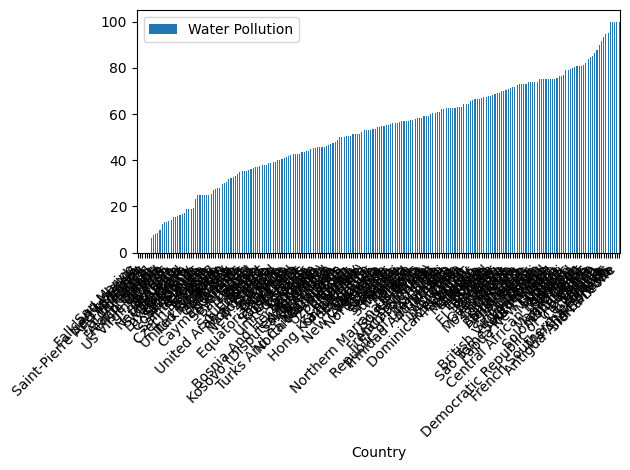

In [5]:

sorted_df = df.sort_values('Water Pollution', ascending=True)
ax = sorted_df.plot(x='Country', y='Water Pollution', kind='bar')
ax.set_xticklabels(sorted_df['Country'], rotation=45, ha='right')
plt.tight_layout()
plt.show()

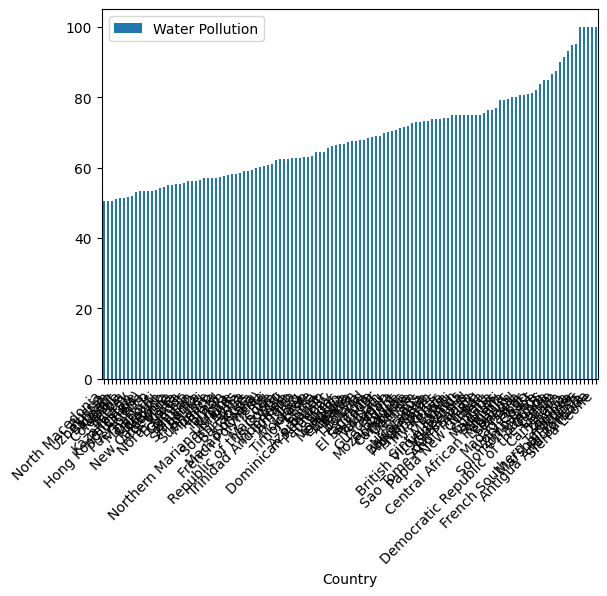

<Figure size 2000x200 with 0 Axes>

In [6]:
sorted_top = sorted_df[sorted_df['Water Pollution'] > 50]
ax = sorted_top.plot(x='Country', y='Water Pollution', kind='bar')
plt.figure(figsize=(20, 2))
ax.set_xticklabels(sorted_top['Country'], rotation=45, ha='right')
#plt.tight_layout()
plt.show()

In [7]:
sorted_top["Country"]

143                North Macedonia
162                         Russia
211                     Uzbekistan
15                         Bahrain
103                         Kuwait
                  ...             
67     French Southern Territories
121               Marshall Islands
126                     Micronesia
7              Antigua And Barbuda
174                   Sierra Leone
Name: Country, Length: 124, dtype: object

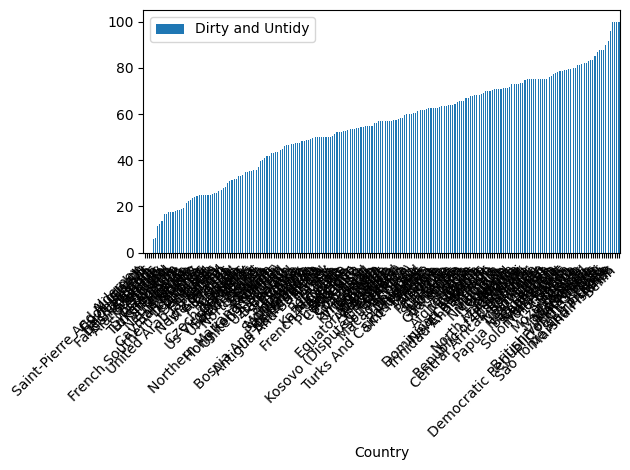

In [8]:
sorted_df = df.sort_values('Dirty and Untidy', ascending=True)
ax = sorted_df.plot(x='Country', y='Dirty and Untidy', kind='bar')
ax.set_xticklabels(sorted_df['Country'], rotation=45, ha='right')
plt.tight_layout()
plt.show()

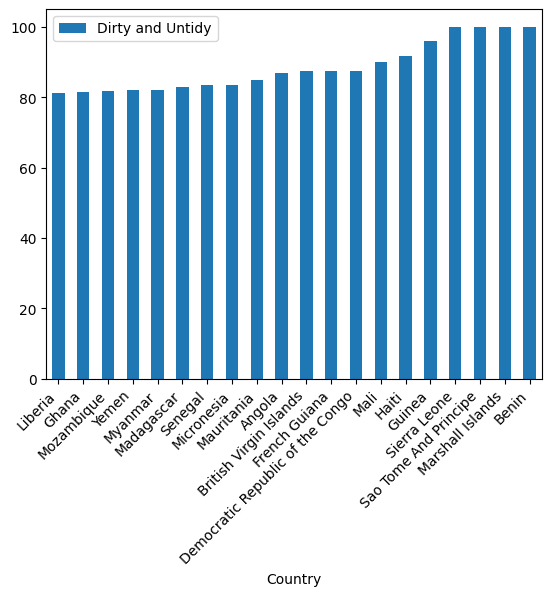

<Figure size 2000x200 with 0 Axes>

In [9]:
sorted_top = sorted_df.iloc[-20:]
ax = sorted_top.plot(x='Country', y='Dirty and Untidy', kind='bar')
plt.figure(figsize=(20, 2))
ax.set_xticklabels(sorted_top['Country'], rotation=45, ha='right')
#plt.tight_layout()
plt.show()

in EDA for the brands, we saw production countries. Looking into those countries:

In [10]:
explode_pays = df_slow['Country'].explode()
unique_pays = explode_pays.unique()
print("Pays de fabrications differents Everlane:",len(unique_pays))
print(unique_pays)
print("---------------------")
explode_pays_hm = df_fast['Pays concernés'].explode()
unique_pays_hm = explode_pays_hm.unique()
print("Pays de fabrications differents H&M:",len(unique_pays_hm))
print(unique_pays_hm)

Pays de fabrications differents Everlane: 6
['Sri Lanka' 'Vietnam' 'China' 'Peru' 'Korea' 'Bangladesh']
---------------------
Pays de fabrications differents H&M: 18
['Bangladesh' 'Chine' 'Pakistan' 'Inde' 'Vietnam' 'Turquie' 'Birmanie'
 'Cambodge' 'Indonésie' 'Maroc' 'Bulgaria' 'Guatemala' 'Kenya' 'Honduras'
 'Roumanie' 'Mexique' 'Ethiopie' 'Italy']


In [11]:
slow_country_counts = df_slow['Country'].explode().value_counts()
slow_country_counts

Country
Vietnam       273
Sri Lanka      68
China          33
Bangladesh      5
Peru            3
Korea           3
Name: count, dtype: int64

In [12]:
fast_country_counts = df_fast['Pays concernés'].explode().value_counts()
fast_country_counts

Pays concernés
Bangladesh    951
Chine         935
Turquie       370
Birmanie      234
Inde          179
Cambodge      177
Indonésie     153
Pakistan      134
Vietnam        69
Maroc          20
Bulgaria       16
Roumanie       15
Mexique        10
Guatemala       4
Italy           4
Honduras        2
Ethiopie        2
Kenya           1
Name: count, dtype: int64

In [13]:
# countries for H&M
# changing the names to english
unique_pays_hm = ['Bangladesh', 'China', 'Pakistan','India' ,'Vietnam', 'Turkey', 'Birmany'
 'Cambodgia', 'Indonesia', 'Morocco', 'Bulgaria', 'Guatemala', 'Kenya', 'Honduras',
 'Romania', 'Mexico', 'Ethiopia', 'Italy']
info_fast = df[df['Country'].isin(unique_pays_hm)]
info_fast

,Country,Air Pollution,Drinking Water Pollution and Inaccessibility,Dissatisfaction with Garbage Disposal,Dirty and Untidy,Noise and Light Pollution,Water Pollution,Dissatisfaction with Spending Time in the City,Dissatisfaction with Green and Parks in the City
16,Bangladesh,78.19,56.20,78.35,77.70,63.37,73.74,73.86,67.45
30,Bulgaria,68.00,30.19,56.04,58.01,50.51,40.78,50.70,33.88
39,China,79.94,55.38,49.25,48.17,55.67,64.36,70.21,39.84
59,Ethiopia,62.31,59.15,75.71,73.26,59.78,67.50,57.04,69.92
78,Guatemala,63.64,60.58,70.00,65.57,55.66,70.67,55.45,55.29
83,Honduras,65.13,55.65,77.50,79.69,49.22,71.88,59.29,59.17
87,India,64.85,52.30,66.35,62.73,58.98,68.66,59.59,52.06
88,Indonesia,60.48,47.46,64.86,56.27,50.72,62.58,54.58,52.71
94,Italy,50.32,31.37,49.11,54.91,48.51,40.69,43.77,46.75
101,Kenya,58.18,56.49,68.93,67.96,49.03,74.03,53.74,43.51


In [14]:
# countries for Everlane
# change Korea to South Korea
unique_pays_slow = ["South Korea" if item == "Korea" else item for item in unique_pays]
info_slow = df[df['Country'].isin(unique_pays_slow)]
info_slow

,Country,Air Pollution,Drinking Water Pollution and Inaccessibility,Dissatisfaction with Garbage Disposal,Dirty and Untidy,Noise and Light Pollution,Water Pollution,Dissatisfaction with Spending Time in the City,Dissatisfaction with Green and Parks in the City
16,Bangladesh,78.19,56.20,78.35,77.70,63.37,73.74,73.86,67.45
39,China,79.94,55.38,49.25,48.17,55.67,64.36,70.21,39.84
153,Peru,76.60,61.96,64.44,70.93,67.91,76.31,64.34,54.66
182,South Korea,68.63,28.28,37.54,37.02,49.82,37.86,56.58,39.45
185,Sri Lanka,53.34,35.30,58.59,48.12,50.51,56.94,48.24,41.49
214,Vietnam,78.06,56.52,75.94,71.07,64.76,73.02,69.67,58.04


In [15]:
!pip install geopandas

In [16]:
!pip install getdata

  Using cached getdata-0.0.0.tar.gz (1.5 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [13 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\PC\AppData\Local\Temp\pip-install-35r3xvul\getdata_e923dfddbfb047a1bffdf39fbb5db92c\setup.py", line 6, in <module>
          README = (HERE / "README.md").read_text()
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "C:\Users\PC\miniconda3\Lib\pathlib.py", line 1058, in read_text
          with self.open(mode='r', encoding=encoding, errors=errors) as f:
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "C:\Users\PC\miniconda3\Lib\pathlib.py", line 1044, in open
          return io.open(self, mode, buffering, encoding, errors, newline)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
      FileNotFoundError: [

showing pollution index per country bcs it looks cool

In [17]:
!pip install pycountry

   ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.2 MB 960.0 kB/s eta 0:00:07
   - -------------------------------------- 0.3/6.2 MB 2.7 MB/s eta 0:00:03
   --- ------------------------------------ 0.6/6.2 MB 3.8 MB/s eta 0:00:02
   ----- ---------------------------------- 0.8/6.2 MB 4.6 MB/s eta 0:00:02
   ------ --------------------------------- 1.1/6.2 MB 4.9 MB/s eta 0:00:02
   -------- ------------------------------- 1.3/6.2 MB 5.0 MB/s eta 0:00:01
   ---------- ----------------------------- 1.6/6.2 MB 5.1 MB/s eta 0:00:01
   ------------ --------------------------- 1.9/6.2 MB 5.2 MB/s eta 0:00:01
   ------------- -------------------------- 2.1/6.2 MB 5.2 MB/s eta 0:00:01
   --------------- ------------------------ 2.4/6.2 MB 5.3 MB/s eta 0:00:01
   ----------------- ---------------------- 2.7/6.2 MB 5.3 MB/s eta 0:00:01
   ------------------- -

In [19]:
#https://melaniesoek0120.medium.com/data-visualization-how-to-plot-a-map-with-geopandas-in-python-73b10dcd4b4b
import pycountry 
def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE
# create a column for code 
df['CODE']=alpha3code(df.Country)
df.head()

,Country,Air Pollution,Drinking Water Pollution and Inaccessibility,Dissatisfaction with Garbage Disposal,Dirty and Untidy,Noise and Light Pollution,Water Pollution,Dissatisfaction with Spending Time in the City,Dissatisfaction with Green and Parks in the City,CODE
0,Afghanistan,77.68,63.04,73.84,68.18,55.43,73.81,75.96,64.88,AFG
1,Aland Islands,16.67,4.17,12.50,16.67,45.83,10.00,8.33,25.00,None
2,Albania,69.03,66.94,67.65,63.40,52.52,67.55,60.19,63.07,ALB
3,Alderney,0.00,12.50,0.00,0.00,0.00,0.00,0.00,0.00,None
4,Algeria,51.50,45.10,75.00,67.00,45.92,53.30,51.00,69.07,DZA


In [22]:
df_codes = df.dropna()
df_codes.head()

,Country,Air Pollution,Drinking Water Pollution and Inaccessibility,Dissatisfaction with Garbage Disposal,Dirty and Untidy,Noise and Light Pollution,Water Pollution,Dissatisfaction with Spending Time in the City,Dissatisfaction with Green and Parks in the City,CODE
0,Afghanistan,77.68,63.04,73.84,68.18,55.43,73.81,75.96,64.88,AFG
1,Aland Islands,16.67,4.17,12.50,16.67,45.83,10.00,8.33,25.00,None
2,Albania,69.03,66.94,67.65,63.40,52.52,67.55,60.19,63.07,ALB
3,Alderney,0.00,12.50,0.00,0.00,0.00,0.00,0.00,0.00,None
4,Algeria,51.50,45.10,75.00,67.00,45.92,53.30,51.00,69.07,DZA


In [24]:
import geopandas

In [25]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

C:\Users\PC\AppData\Local\Temp\ipykernel_8376\3939914640.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))


In [29]:
world.columns=['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']
merge=pd.merge(world,df,on='CODE')
merge.head()

,pop_est,continent,name,CODE,gdp_md_est,geometry,Country,Air Pollution,Drinking Water Pollution and Inaccessibility,Dissatisfaction with Garbage Disposal,Dirty and Untidy,Noise and Light Pollution,Water Pollution,Dissatisfaction with Spending Time in the City,Dissatisfaction with Green and Parks in the City
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,42.95,27.56,53.29,52.03,46.79,60.90,48.72,43.75
1,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,23.49,18.49,26.04,33.77,41.82,35.25,20.43,23.10
2,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States,28.49,28.75,29.17,39.69,46.94,43.96,25.03,29.50
3,18513930.0,Asia,Kazakhstan,KAZ,181665,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",Kazakhstan,77.87,43.64,61.41,52.63,48.29,52.92,61.92,41.59
4,33580650.0,Asia,Uzbekistan,UZB,57921,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",Uzbekistan,52.91,33.72,54.88,47.09,50.00,50.61,46.25,37.80


In [31]:
!pip install mapclassify

C:\Users\PC\AppData\Local\Temp\ipykernel_8376\2644744201.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
C:\Users\PC\AppData\Local\Temp\ipykernel_8376\2644744201.py:20: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for i, (x, y, label) in enumerate(zip(top.geometry.centroid.x, top.geometry.centroid.y, top['name'])):


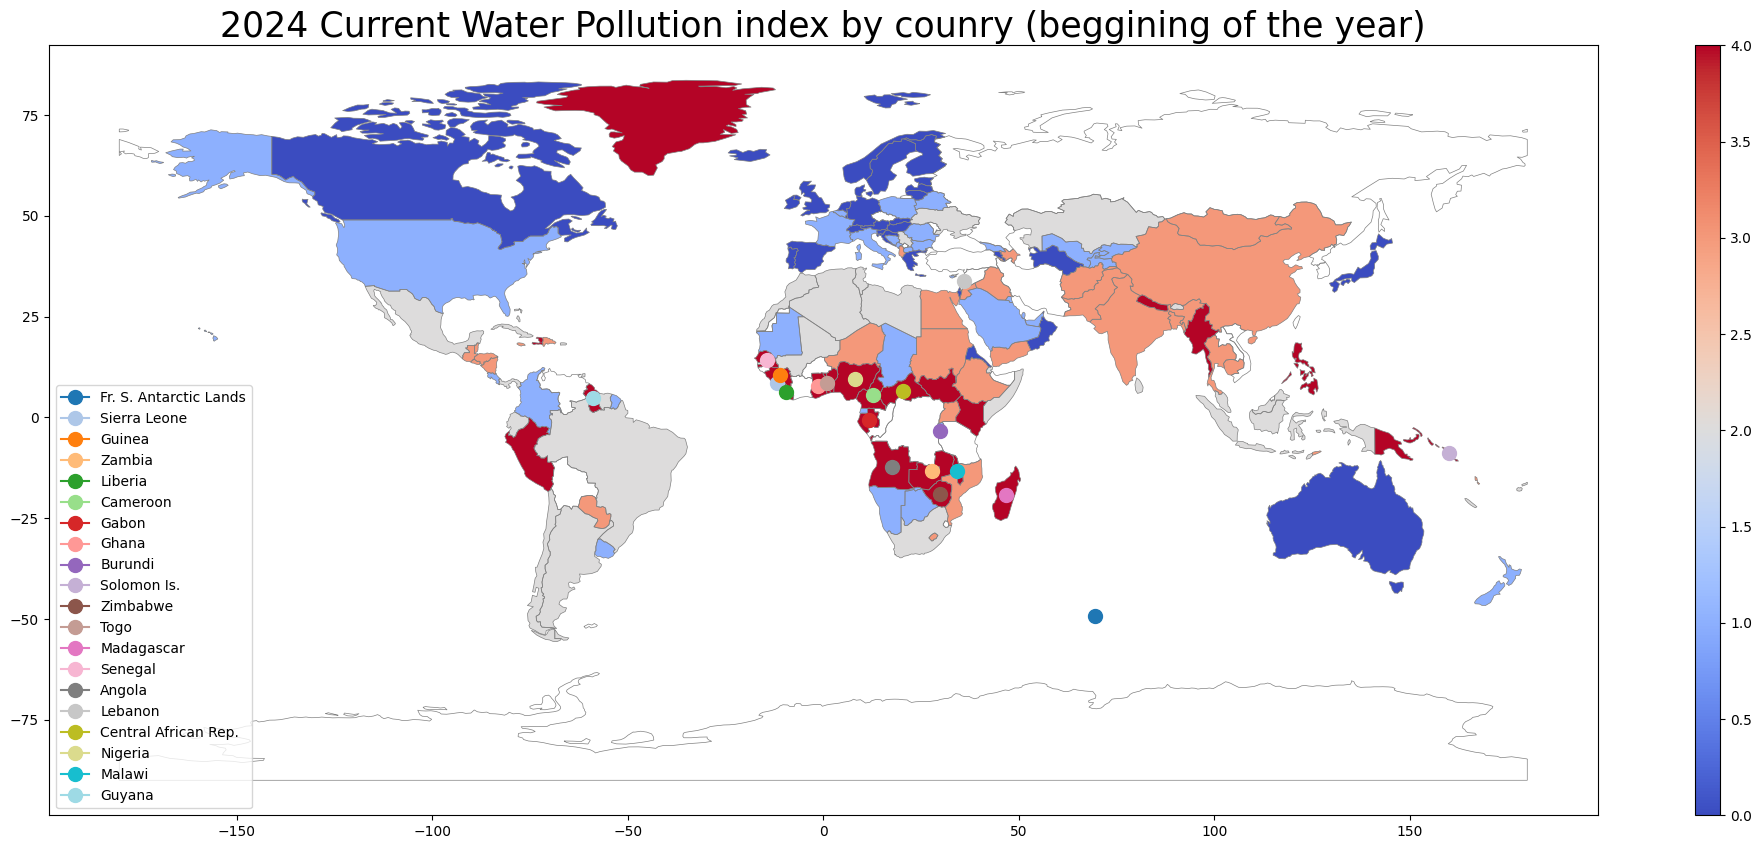

In [41]:
# merge.plot(column='Water Pollution', scheme="quantiles",
#            figsize=(25, 20),
#            legend=True,cmap='coolwarm')
# plt.title('2024 Current Water Pollution index by counry (beggining of the year)',fontsize=25)

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.columns=['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']
cmap = plt.get_cmap('tab20')

merge = pd.merge(world, df, on='CODE')

fig, ax = plt.subplots(1, 1, figsize=(25, 10))
world.boundary.plot(ax=ax, color='gray',linewidth=0.5)

plot = merge.plot(column='Water Pollution', ax=ax, legend=True, cmap='coolwarm', scheme="quantiles")
ax.set_title('2024 Current Water Pollution index by counry (beggining of the year)',fontsize=25)

#for the 10 most polluted countries
top = merge.sort_values('Water Pollution', ascending=False).head(20)
for i, (x, y, label) in enumerate(zip(top.geometry.centroid.x, top.geometry.centroid.y, top['name'])):
    ax.plot(x, y, marker='o', markersize=10, color=cmap(i), label=label)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, loc='lower left')

# Adjust the size of the colorbar
colorbar = plot.get_figure().colorbar(plot.get_children()[1], ax=ax, aspect=30)

plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_8376\211653188.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for i, (x, y, label) in enumerate(zip(top.geometry.centroid.x, top.geometry.centroid.y, top['name'])):


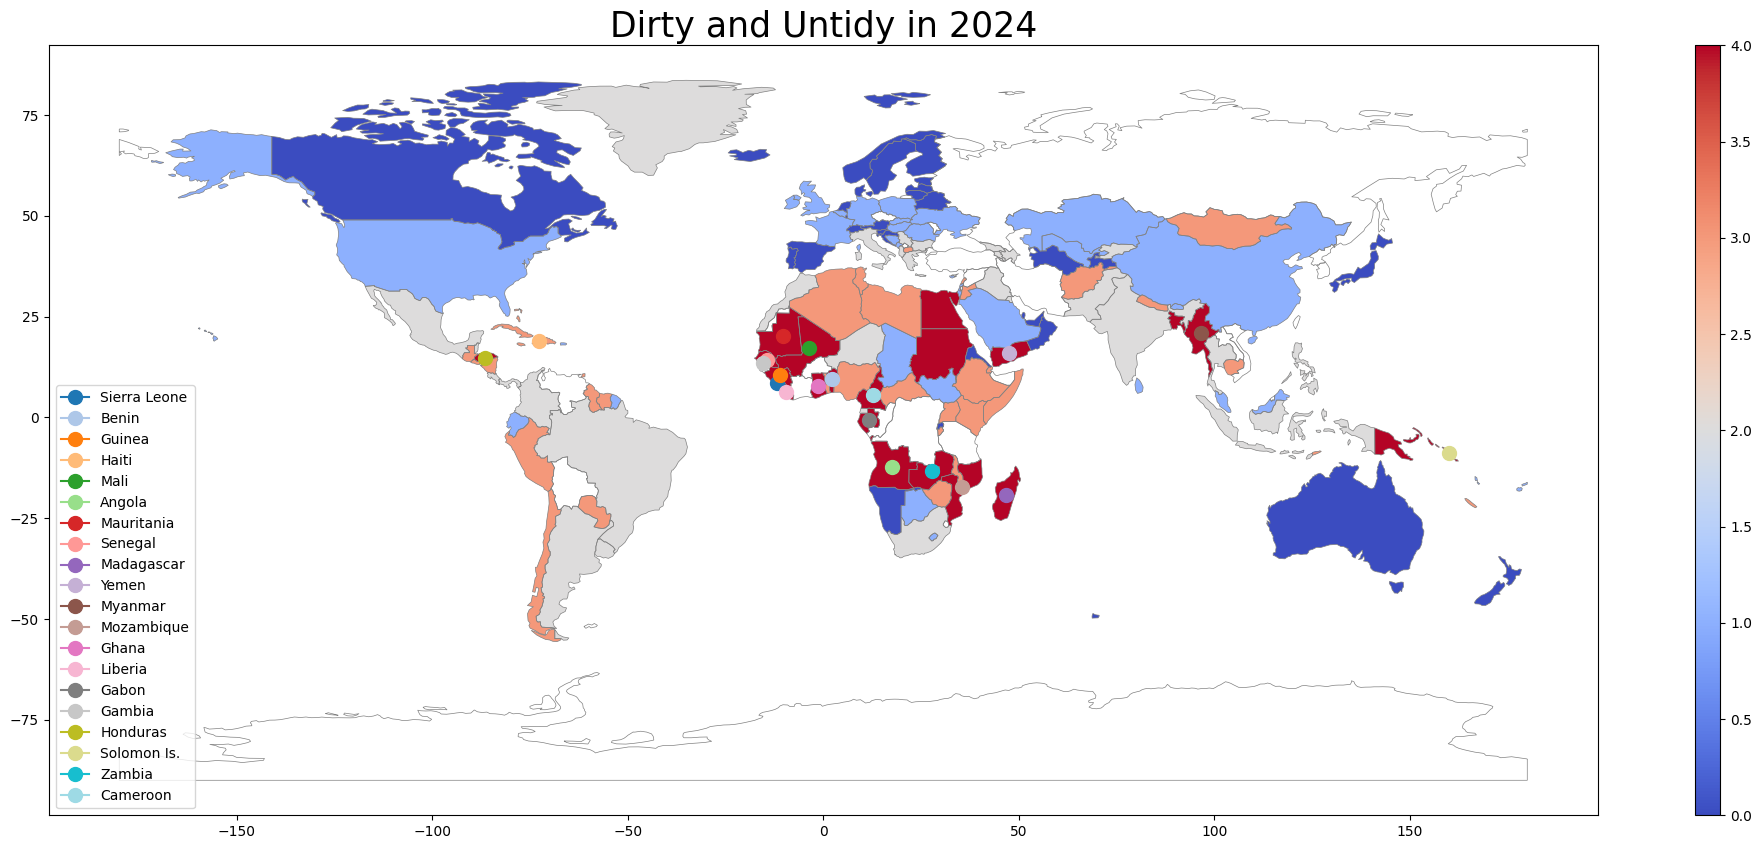

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(25, 10))
world.boundary.plot(ax=ax, color='gray',linewidth=0.5)

plot = merge.plot(column='Dirty and Untidy', ax=ax, legend=True, cmap='coolwarm', scheme="quantiles")
ax.set_title(f'Dirty and Untidy in 2024', fontsize=25)


top = merge.sort_values('Dirty and Untidy', ascending=False).head(20)
for i, (x, y, label) in enumerate(zip(top.geometry.centroid.x, top.geometry.centroid.y, top['name'])):
    ax.plot(x, y, marker='o', markersize=10, color=cmap(i), label=label)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, loc='lower left')

# Adjust the size of the colorbar
colorbar = plot.get_figure().colorbar(plot.get_children()[1], ax=ax, aspect=30)

plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_8376\3495651893.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
C:\Users\PC\AppData\Local\Temp\ipykernel_8376\3495651893.py:15: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for i, (x, y, label) in enumerate(zip(top.geometry.centroid.x, top.geometry.centroid.y, top['name'])):


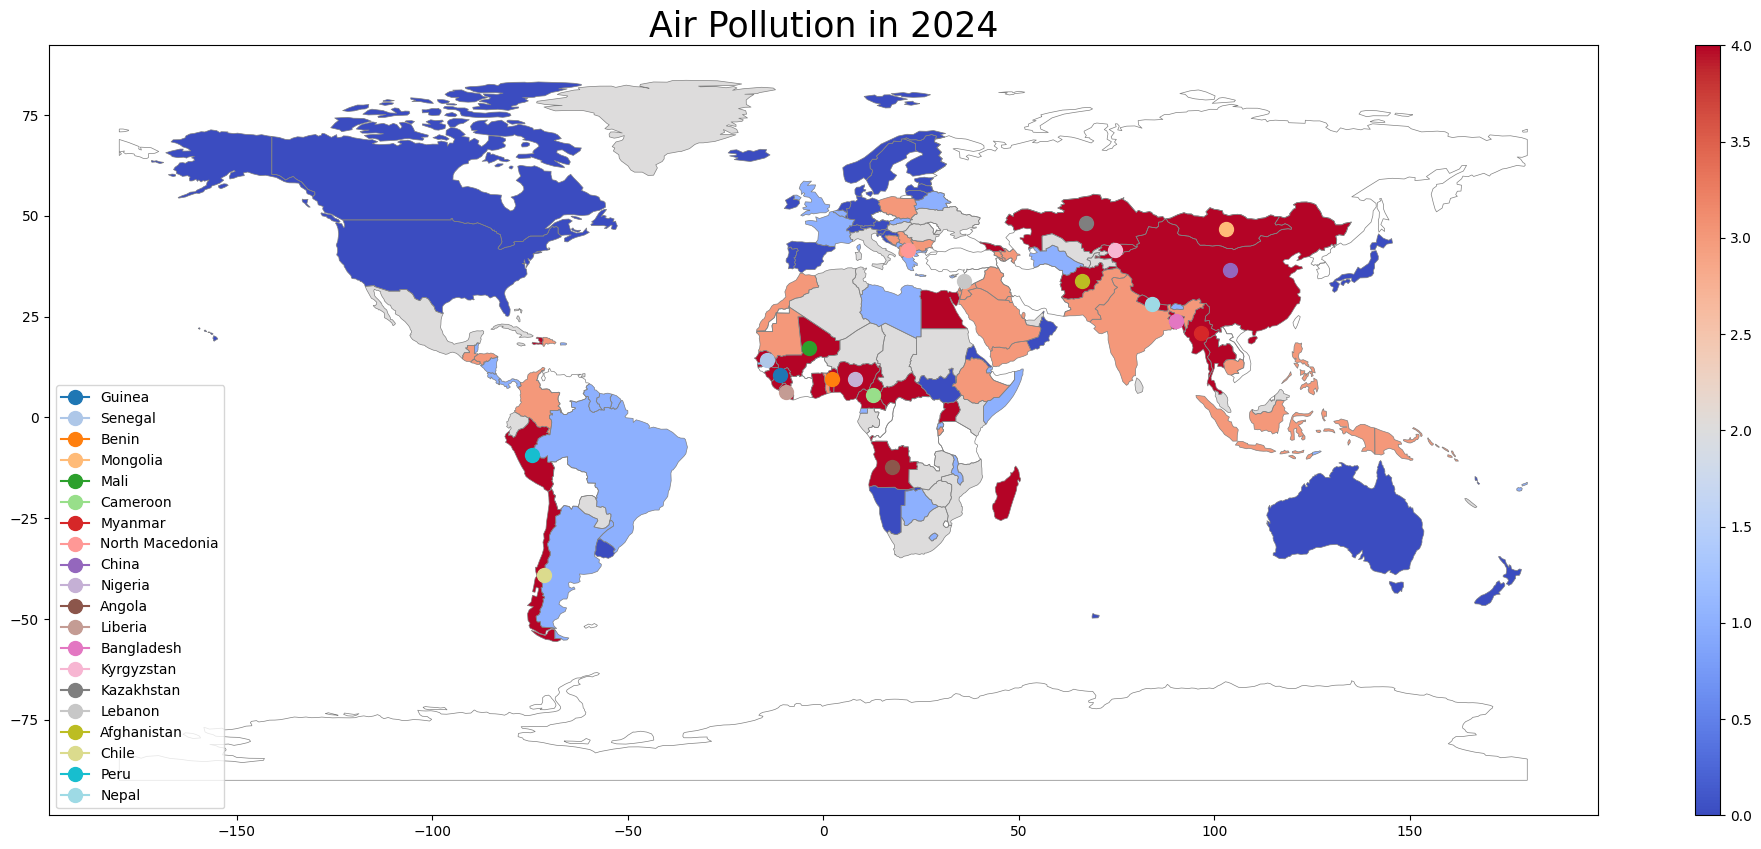

In [44]:

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.columns=['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']
cmap = plt.get_cmap('tab20')

merge = pd.merge(world, df, on='CODE')

fig, ax = plt.subplots(1, 1, figsize=(25, 10))
world.boundary.plot(ax=ax, color='gray',linewidth=0.5)

plot = merge.plot(column='Air Pollution', ax=ax, legend=True, cmap='coolwarm', scheme="quantiles")
ax.set_title(f'Air Pollution in 2024', fontsize=25)


top = merge.sort_values('Air Pollution', ascending=False).head(20)
for i, (x, y, label) in enumerate(zip(top.geometry.centroid.x, top.geometry.centroid.y, top['name'])):
    ax.plot(x, y, marker='o', markersize=10, color=cmap(i), label=label)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, loc='lower left')

# Adjust the size of the colorbar
colorbar = plot.get_figure().colorbar(plot.get_children()[1], ax=ax, aspect=30)

plt.show()